In [1]:
from utils import *

import numpy as np


w = np.array([3,5,7,9])
j = np.random.randint(200,1000,20)

# wp = []
# tau_h = []
# for s in j:
#     for i in w:
#         t = get_wp_from_random_variate(seed=s,wc=i)
#         wp.append(t)
#         tau = get_tau_h(t)
#         tau_h.append(tau)


import matplotlib.pyplot as plt

[0.002410275026242507, 0.0026158484655526247, 0.002848915738432006, 0.0031146128512399636, 0.003419335036696342, 0.0037711267295848045, 0.004180220275055831, 0.0046597920140573805, 0.005227042261706389, 0.0059047683301151396, 0.00672370623397584, 0.007726103425077646, 0.008971323851780174, 0.010544926801396553, 0.012573926237755568, 0.015253573621035424, 0.018896852407237305, 0.02403183382508996, 0.03160856489854551, 0.043484234233877685, 0.06371944043559165, 0.10336928342012719, 0.894219121970692, 104.30620464947417, 2085.3152569225626, 5000.0, 2085.3152569225626, 104.30620464947417, 0.894219121970692, 0.10336928342012719, 0.06371944043559165, 0.043484234233877685, 0.03160856489854551, 0.02403183382508996, 0.018896852407237305, 0.015253573621035424, 0.012573926237755568, 0.010544926801396553, 0.008971323851780174, 0.007726103425077646, 0.00672370623397584, 0.0059047683301151396, 0.005227042261706389, 0.0046597920140573805, 0.004180220275055831, 0.0037711267295848045, 0.003419335036696

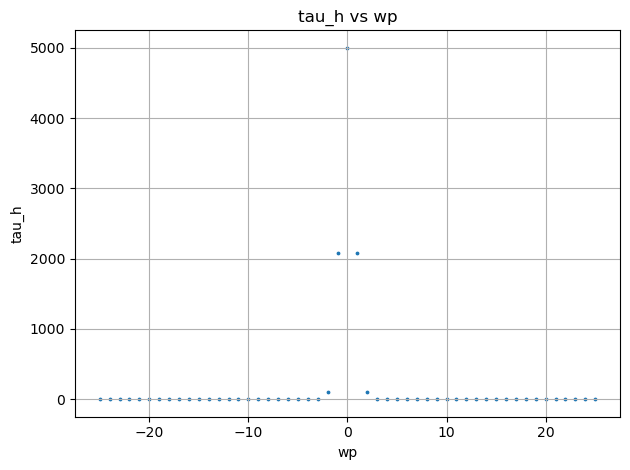

In [5]:
wp = np.linspace(-25,25,51)


t = []
for i in wp:
    tau_h = get_tau_h(i)
    t.append(tau_h)
print(t)
plt.scatter(wp,t,s=3)
plt.xlabel('wp')
plt.ylabel('tau_h')

plt.title('tau_h vs wp')

plt.grid()
plt.tight_layout()


plt.savefig('tau_h_vs_wp.jpg',dpi=300)
plt.show()

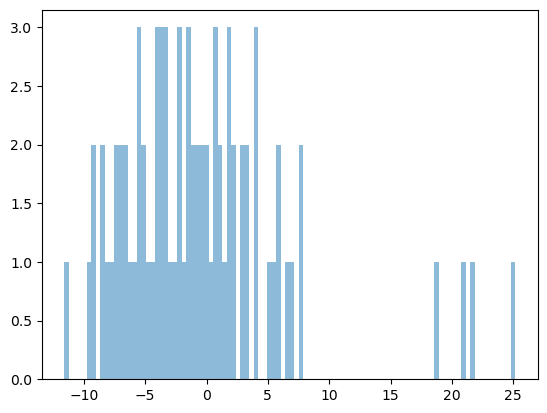

In [9]:
plt.hist(wp, bins=100, alpha=0.5, label='wp')
plt.show()

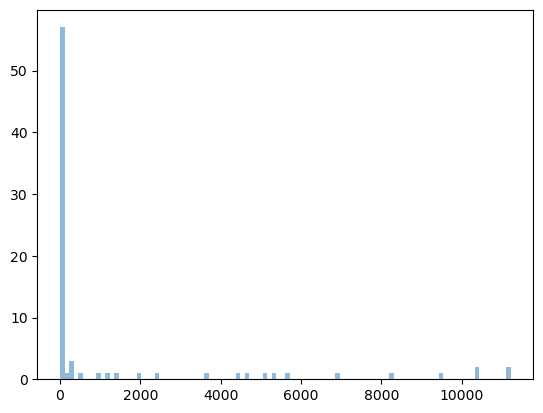

In [10]:
plt.hist(tau_h, bins=100, alpha=0.5, label='tau_h')
plt.show()

CDF of w' direction is saved as Rwwp_cdf.txt
